# ASSIGNMENT 1

### Group number 4  - G4
- CED18I039 Paleti Krishnasai
- COE18B056 Thigulla Vamsi Krishna
- COE18B065 Srinivasan R Sharma

-----------------------------------------------------------------------------------------------------------------

**Q4. Classify flower 0, 50, and 100 from the Iris Dataset (.csv file) attached along with the
assignment document into one of the three classes as given in dataset specification**

**Dataset Specifications:**
Total number of samples = 150
Number of classes = 3 (Iris setosa, Iris virginica, and Iris versicolor)
The number of samples in each class = 50.

**Directions to classify:**
1. Use features PetalLengthCm and PetalWidthCm only for classification.
2. Consider flowers 0,50 and 100 as test cases.
3. Plot the distribution of rest 147 sample points along with their classes( differentiate
classes with different colour). Consider PetalWidthCm along Y-axis and PetalLengthCm
along X-axis.
4. Capture the properties of the distribution and use suitable distance metrics to classify the
flowers 0,50 and 100 into one of the classes.
5. Print their class and plot the points on the previous plot with a marker differentiating the
three points.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Iris_dataset.csv')

In [3]:
dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
dataset.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [5]:
dataset.drop(columns=['sepal.length','sepal.width'],axis=1,inplace=True)

In [6]:
dataset.corr()

,petal.length,petal.width
petal.length,1.000000,0.962865
petal.width,0.962865,1.000000


In [7]:
dataset.describe()

,petal.length,petal.width
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [8]:
# segregation
index_testdata=[0,50,100]
testdata=dataset.iloc[index_testdata]
train_data=dataset.drop(index_testdata,axis=0)
testdata.rename(columns = {'variety':'TEST'}, inplace = True) 

/home/paleti/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
test_data=testdata.iloc[:,0:2]

In [10]:
test_data

,petal.length,petal.width
0,1.4,0.2
50,4.7,1.4
100,6.0,2.5


In [11]:
test_data.shape


(3, 2)

In [12]:
train_data.shape

(147, 3)

In [13]:
train_X=train_data['petal.length']
train_Y=train_data['petal.width']

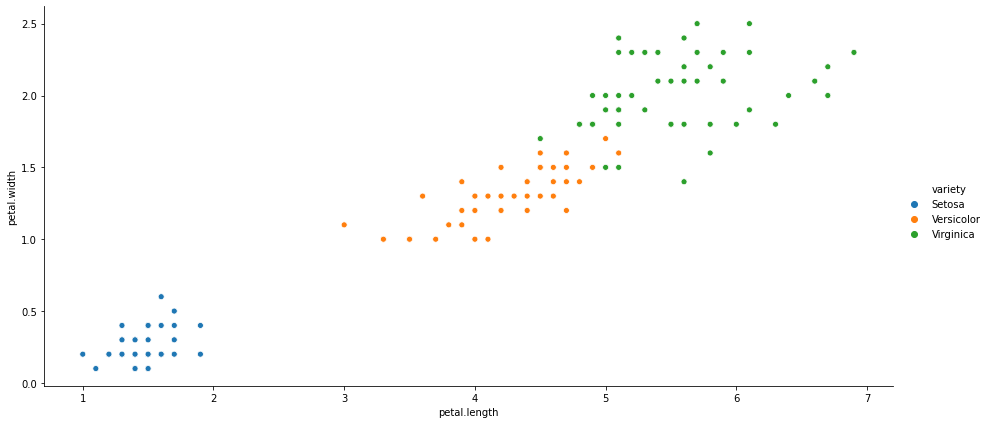

In [14]:
#plotting train data

import seaborn as sns 
sns.relplot(data=train_data, x="petal.length", y="petal.width", hue="variety",height=6, aspect=9/4.27) 

In [15]:
setosa_data=dataset.iloc[0:49,:]
versicolor_data=dataset.iloc[51:99,:]
virginica_data=dataset.iloc[101:149,:]


In [16]:
setosa_meanlength= setosa_data['petal.length'].mean()
versicolor_meanlength= versicolor_data['petal.length'].mean()
virginica_meanlength= virginica_data['petal.length'].mean()


In [17]:
setosa_meanwidth= setosa_data['petal.width'].mean()
versicolor_meanwidth= versicolor_data['petal.width'].mean()
virginica_meanwidth= virginica_data['petal.width'].mean()

In [18]:
# Cluster formation , chose mahalanobis as it is more robust to outliers and works well with clusters .
#Chosen Distance Measure 
def mahalanobis(target,meanL,meanW,typ):
    hq=target
    ht=[meanL,meanW]
    p=np.subtract(hq,ht)
    pT=p.transpose()
    x=[i-meanL for i in typ['petal.length']]
    y=[i-meanW for i in typ['petal.width']]
    z=np.column_stack((x, y))
    zT=z.transpose()
    E=np.matmul(zT,z)
    cov=np.divide(E,len(z)-1)
    A=np.linalg.inv(cov)
    D=np.matmul(pT,A)
    D=np.matmul(D,p)
    return D

In [19]:
def classification(t):
    d1=mahalanobis(t,setosa_meanlength,setosa_meanwidth,setosa_data)
    d2=mahalanobis(t,versicolor_meanlength,versicolor_meanwidth,versicolor_data)
    d3=mahalanobis(t,virginica_meanlength,virginica_meanwidth,virginica_data)
    min_dist=min(d1,d2,d3)
    if(min_dist==d1):
        final_class="Setosa"
    elif(min_dist==d2):
        final_class="Versicolor"
    else:
        final_class="Virginica"
    return final_class

In [20]:
# Classification
print("Flower 0 is of the variety ",classification(test_data.iloc[0]))
print("Flower 50 is of the variety ",classification(test_data.iloc[1]))
print("Flower 100 is of the variety ",classification(test_data.iloc[2]))


Flower 0 is of the variety  Setosa
Flower 50 is of the variety  Versicolor
Flower 100 is of the variety  Virginica


<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

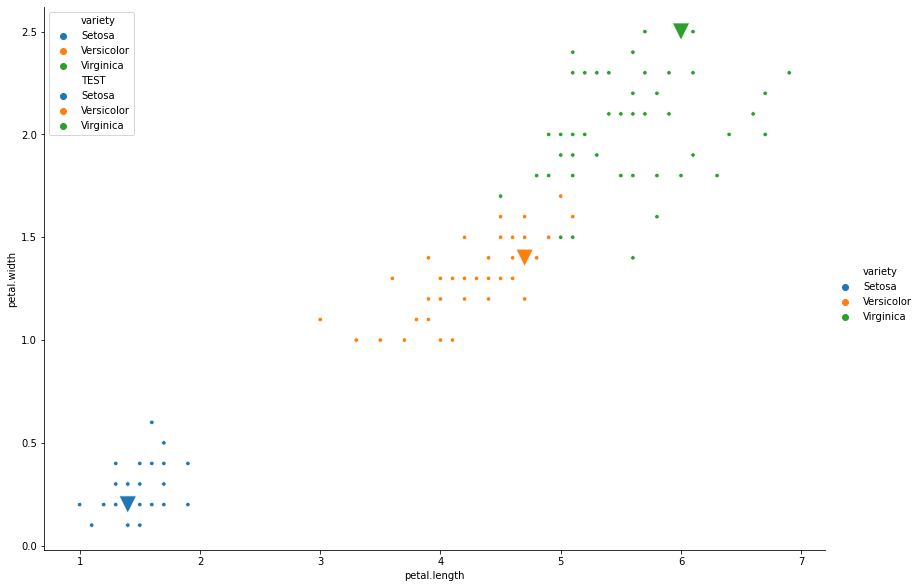

In [21]:
#Plotting the test data using a marker
sns.relplot(data=train_data, x="petal.length", y="petal.width", hue="variety",s=20,height=8.27, aspect=11.7/8.27)
sns.scatterplot(data=testdata, x="petal.length", y="petal.width",hue="TEST",marker='v',s=300)

-----------------------------------------------------------------------------------------------------------------